# Simple Linear Regression 
1 independent feature 1 target feature

In [40]:
from warnings import filterwarnings
filterwarnings("ignore")

![Screenshot 2024-10-12 at 2.35.53 PM.png](<attachment:Screenshot 2024-10-12 at 2.35.53 PM.png>)
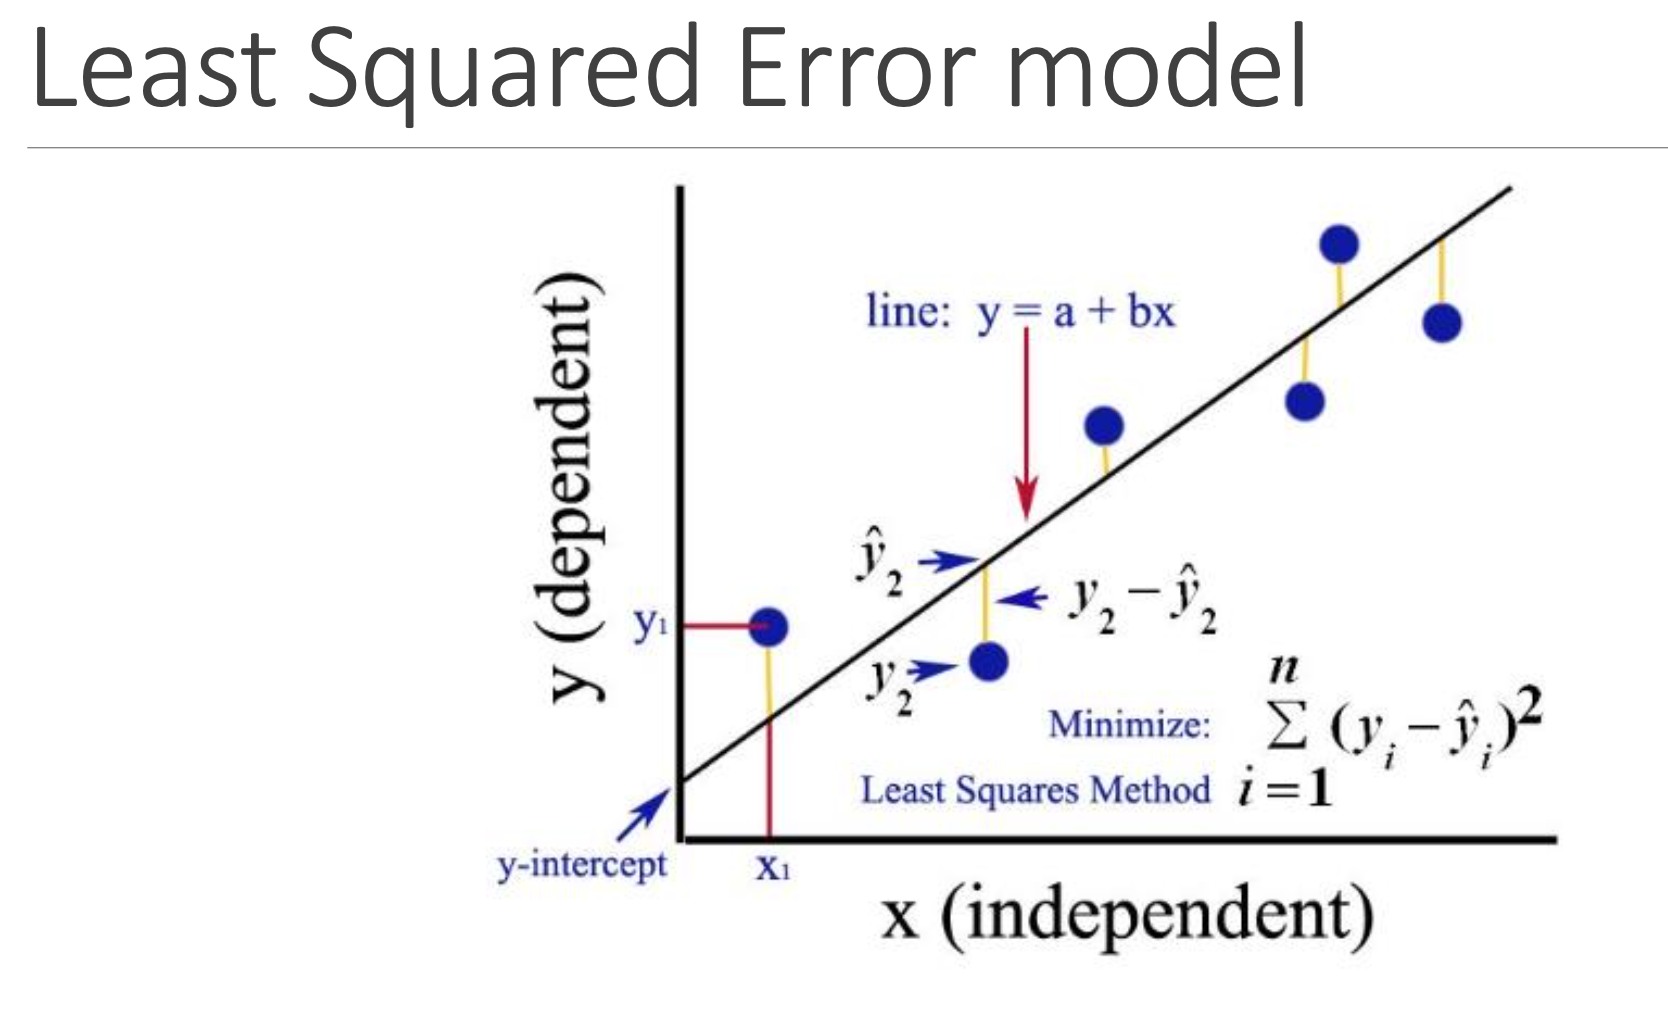

In [41]:

import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Estimate profit based on RND budget

### Perform scatter plot on PROFIT vs RND

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

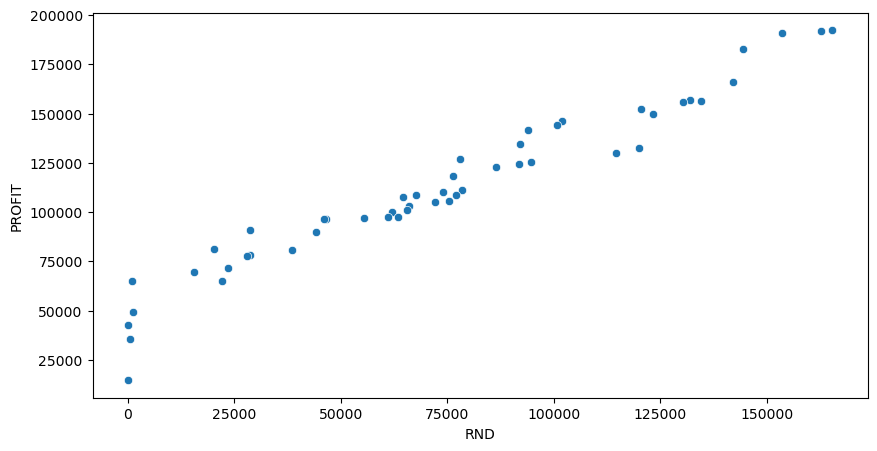

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="RND",y="PROFIT")
plt.show()

### Seperate x (RND) and y (PROFIT)


In [44]:
x = df[["RND"]]
y = df[["PROFIT"]]

In [45]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [46]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### create a linear regression model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

### Get the slope and intercept

In [49]:
slope = model.coef_
intercept = model.intercept_
print(f"Slope : {slope} , Intercept : {intercept}")

Slope : [[0.85429137]] , Intercept : [49032.89914125]


### PROFIT (estimated) = 49032.9 + 0.8543 * RND

### Out of sample prediction
estimate the profit for startup with RND spend of 100000

In [50]:
rnd = 1_00_000 
profit_pred = model.predict([[rnd]])
print(f"Predicted profit : {profit_pred}")

Predicted profit : [[134462.03623513]]


In [51]:
rnd1 = 2_00_000
profit_pred = model.predict([[rnd1]])
print(f"Profit predicted : {profit_pred}")

Profit predicted : [[219891.17332901]]


# PLOT REGRESSION PLOT

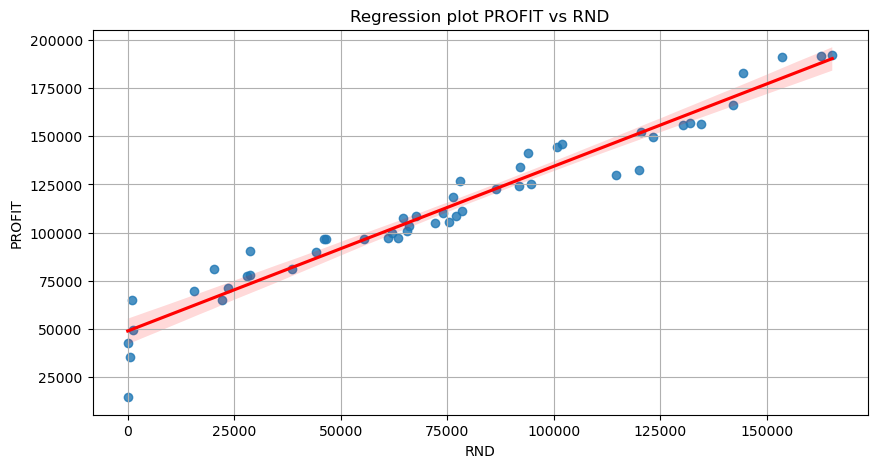

In [52]:
plt.figure(figsize =(10,5))
sns.regplot(data=df,x = "RND",y="PROFIT",line_kws={"color":"red"})
plt.title("Regression plot PROFIT vs RND")
plt.grid()
plt.show()

### Model Evaluation

1.Mean Squared Error(MSE)
2.Root Mean Squared Error(RMSE)
3.Mean Absolute Error (MAE)
4.Mean Absolute Percentage Error (MAPE)
5.R2 Score 

### Predict values of x data

In [54]:
ypred = model.predict(x)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [55]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,ypred)
print(f"Mean Squared Error : {mse:.2f}")

Mean Squared Error : 85120931.33


In [60]:

rmse = mse **(1/2)
print(f"Root Mean Squared Error : {rmse:.2f}")

Root Mean Squared Error : 9226.10


In [63]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y,ypred)
print(f"Mean Absolute Error : {mae:.2f}")


Mean Absolute Error : 6910.98


In [65]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y,ypred)
print(f"Mean Absolute percentage Error : {mape:.4f}")

Mean Absolute percentage Error : 0.1107


In [67]:
from sklearn.metrics import r2_score
r2 = r2_score(y,ypred)
print(f"R2 score : {r2:.2f}")

R2 score : 0.95


### R2 Score > 0.80 is considered to be good

# Performing Out of Sample Predictions

In [69]:
rnd = 2_00_000
profit_est = model.predict([[rnd]])
print(f"For given RND budget : {rnd:.2f}, Estimated Profit is : {profit_est}")

For given RND budget : 200000.00, Estimated Profit is : [[219891.17332901]]
